 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whalepath = Path("./Resources/whale_returns.csv")
whale_df = pd.read_csv(whalepath, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df = whale_df.sort_index()
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_df = whale_df.dropna().copy()
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algopath = Path("./Resources/algo_returns.csv")
algo_df = pd.read_csv(algopath, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df = algo_df.sort_index()
algo_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [7]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_df = algo_df.dropna().copy()
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
sp500_path = Path("./Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df = sp500_df.sort_index()
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [10]:
# Check Data Types
sp500_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2012-10-01 to 2019-04-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB


In [11]:
# Fix Data Types
#sp500_df['Date'] = pd.to_datetime(sp500_df['Date'])
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')
sp500_df['Close'] = sp500_df['Close'].astype('float')
sp500_df['Close'].dtype

<ipython-input-11-14c66d1d4ebe>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')


dtype('float64')

In [12]:
# Calculate Daily Returns
sp500_df = sp500_df.pct_change(1)
print(sp500_df)

               Close
Date                
2012-10-01       NaN
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
...              ...
2019-04-16  0.000509
2019-04-17 -0.002274
2019-04-18  0.001579
2019-04-22  0.001012
2019-04-23  0.008841

[1649 rows x 1 columns]


In [13]:
# Drop nulls
sp500_df = sp500_df.dropna().copy()
sp500_df

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df = sp500_df.rename(columns={"Close":"SP500"})
sp500_df

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
tot_portfolio = pd.concat([whale_df, algo_df, sp500_df], axis="columns", join="inner")
tot_portfolio

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns for all Portfolios'}, xlabel='Date'>

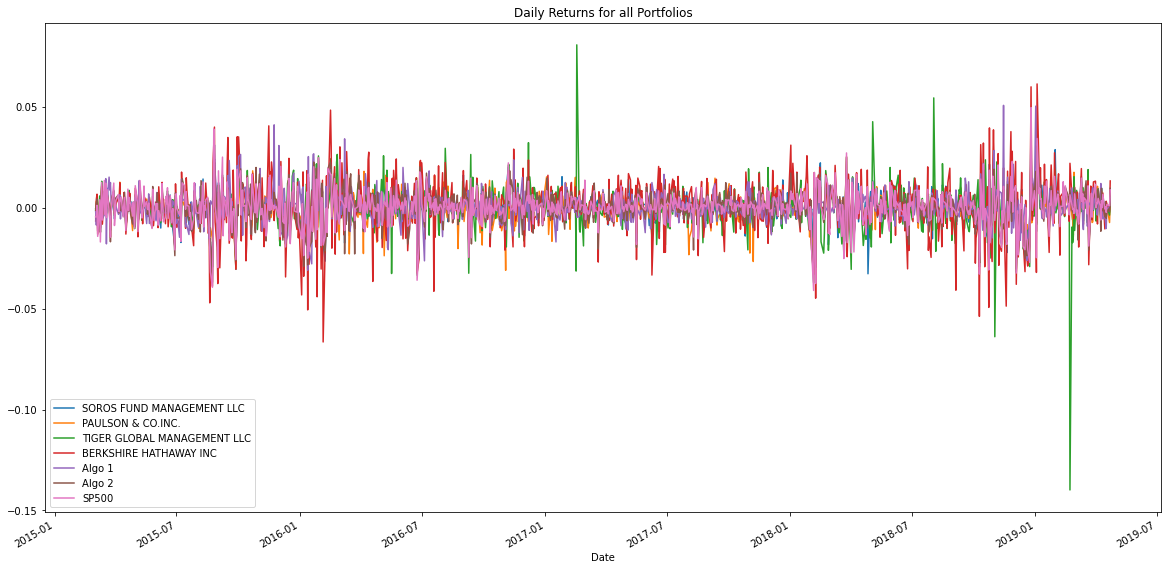

In [16]:
# Plot daily returns of all portfolios
tot_portfolio.plot(figsize=(20,10),title="Daily Returns for all Portfolios")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns for all Portfolios'}, xlabel='Date'>

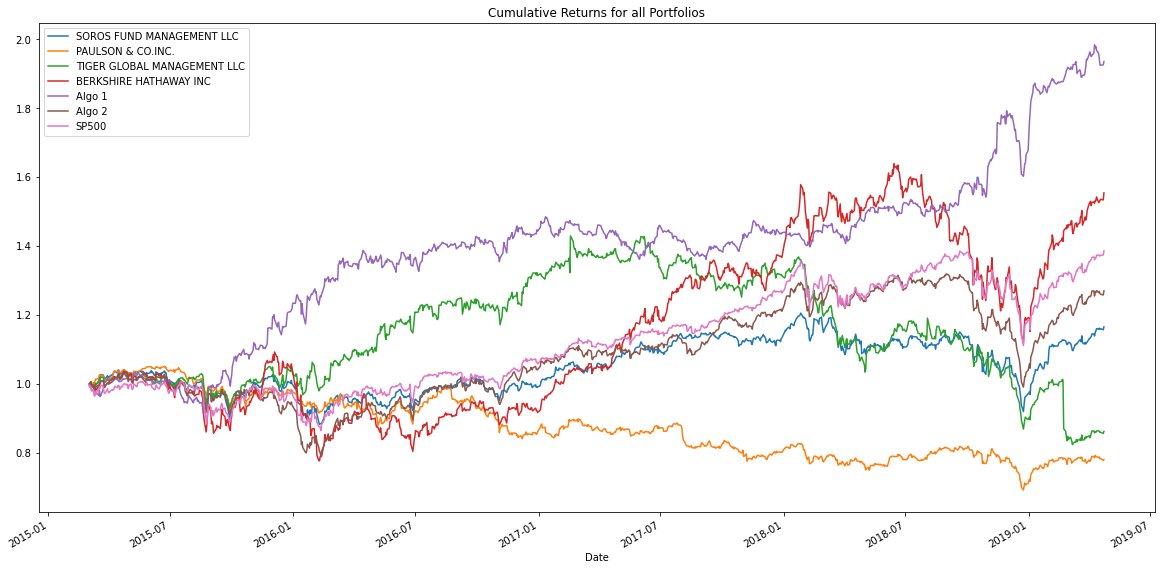

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_return = (1+tot_portfolio).cumprod()
cumulative_return
# Plot cumulative returns
cumulative_return.plot(figsize=(20,10),title="Cumulative Returns for all Portfolios")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Risk'}>

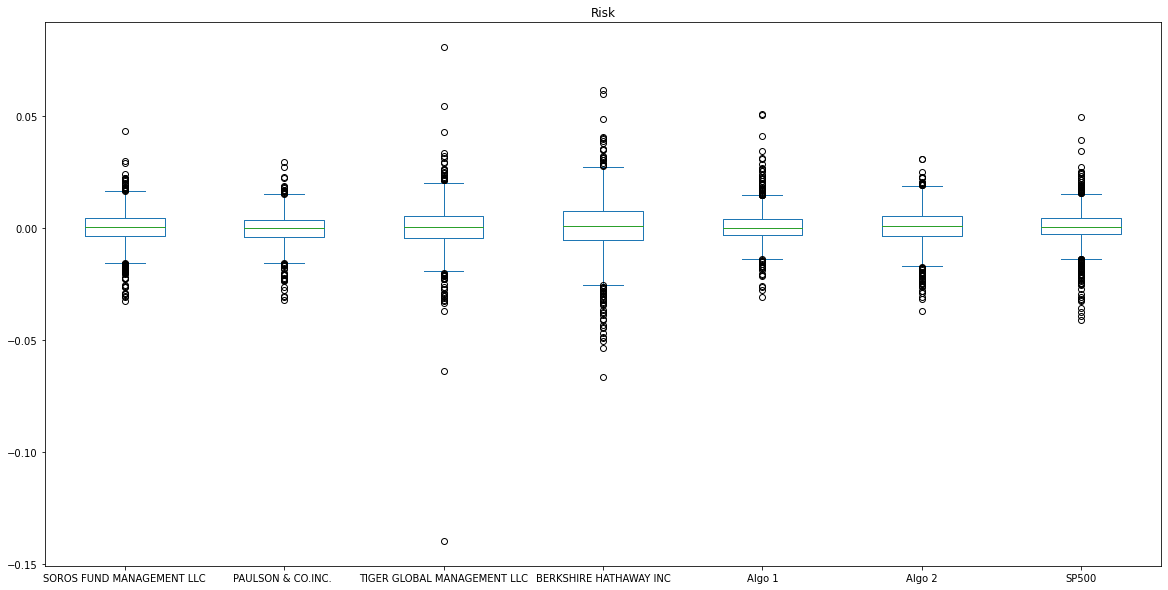

In [18]:
# Box plot to visually show risk
tot_portfolio.plot.box(figsize=(20,10),title="Risk")

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
tot_portfolio.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500                          0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate  the daily standard deviation of S&P 500
std_sp500 = tot_portfolio['SP500'].std()
std_sp500
# Determine which portfolios are riskier than the S&P 500
tot_portfolio.std() > std_sp500

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
SP500                          False
dtype: bool

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
tot_annual_std=(tot_portfolio.std())*np.sqrt(252)

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling STD'}, xlabel='Date'>

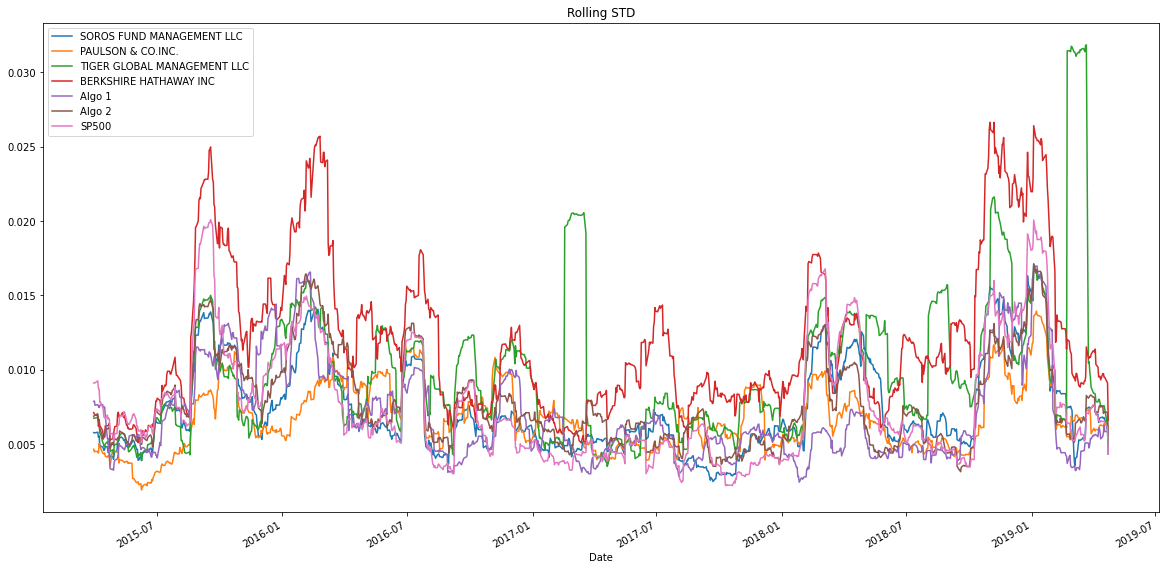

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
tot_roll_std = tot_portfolio.rolling(window=21).std()
# Plot the rolling standard deviation
tot_roll_std.plot(figsize=(20,10),title="Rolling STD")

### Calculate and plot the correlation

In [23]:
# Calculate the correlation
correlation = tot_portfolio.corr()
# Display de correlation matrix
correlation.style.background_gradient(cmap="summer")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [24]:
# Calculate covariance of a single portfolio
bh_covar = tot_portfolio["BERKSHIRE HATHAWAY INC"].cov(tot_portfolio["SP500"])
print(bh_covar)

# Calculate variance of S&P 500
sp500_var = tot_portfolio["SP500"].var()
print(sp500_var)

# Computing beta
beta = bh_covar/sp500_var
beta

# Plot beta trend
beta.plot()

8.302834941861666e-05
7.316632424648712e-05


AttributeError: 'numpy.float64' object has no attribute 'plot'

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [ ]:
# Use `ewm` to calculate the rolling window
sp500_ewm = tot_portfolio["SP500"].ewm(span=21, adjust=False).mean()
sp500_ewm.plot(figsize=(25,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [3]:
# Reading data from 1st stock
googpath = Path("./Resources/goog_historical.csv")
goog_df = pd.read_csv(googpath, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_df = goog_df.sort_index()
goog_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [4]:
# Reading data from 2nd stock
aaplpath = Path("./Resources/aapl_historical.csv")
aapl_df = pd.read_csv(aaplpath, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_df = aapl_df.sort_index()
aapl_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [5]:
# Reading data from 3rd stock
costpath = Path("./Resources/cost_historical.csv")
cost_df = pd.read_csv(costpath, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_df = cost_df.sort_index()
cost_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [6]:
# Combine all stocks in a single DataFrame
costaaplgoog_df = pd.concat([cost_df, aapl_df, goog_df], axis="columns", join="inner")
costaaplgoog_df

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-05-11,COST,195.76,AAPL,188.59,GOOG,1098.26
2018-05-14,COST,195.88,AAPL,188.15,GOOG,1100.20
2018-05-15,COST,195.48,AAPL,186.44,GOOG,1079.23
2018-05-16,COST,198.71,AAPL,188.18,GOOG,1081.77
2018-05-17,COST,199.60,AAPL,186.99,GOOG,1078.59
...,...,...,...,...,...,...
2019-05-03,COST,244.62,AAPL,211.75,GOOG,1185.40
2019-05-06,COST,244.23,AAPL,208.48,GOOG,1189.39
2019-05-07,COST,240.18,AAPL,202.86,GOOG,1174.10


In [ ]:
# Reset Date index


In [7]:
# Reorganize portfolio data by having a column per symbol
columns = ["Symbol", "COST", "Symbol", "AAPL", "Symbol", "GOOG"]
costaaplgoog_df.columns = columns
costaaplgoog_df = costaaplgoog_df.drop(columns=["Symbol"])
costaaplgoog_df

,COST,AAPL,GOOG
Trade DATE,,,
2018-05-11,195.76,188.59,1098.26
2018-05-14,195.88,188.15,1100.20
2018-05-15,195.48,186.44,1079.23
2018-05-16,198.71,188.18,1081.77
2018-05-17,199.60,186.99,1078.59
...,...,...,...
2019-05-03,244.62,211.75,1185.40
2019-05-06,244.23,208.48,1189.39
2019-05-07,240.18,202.86,1174.10


<AxesSubplot:xlabel='Trade DATE'>

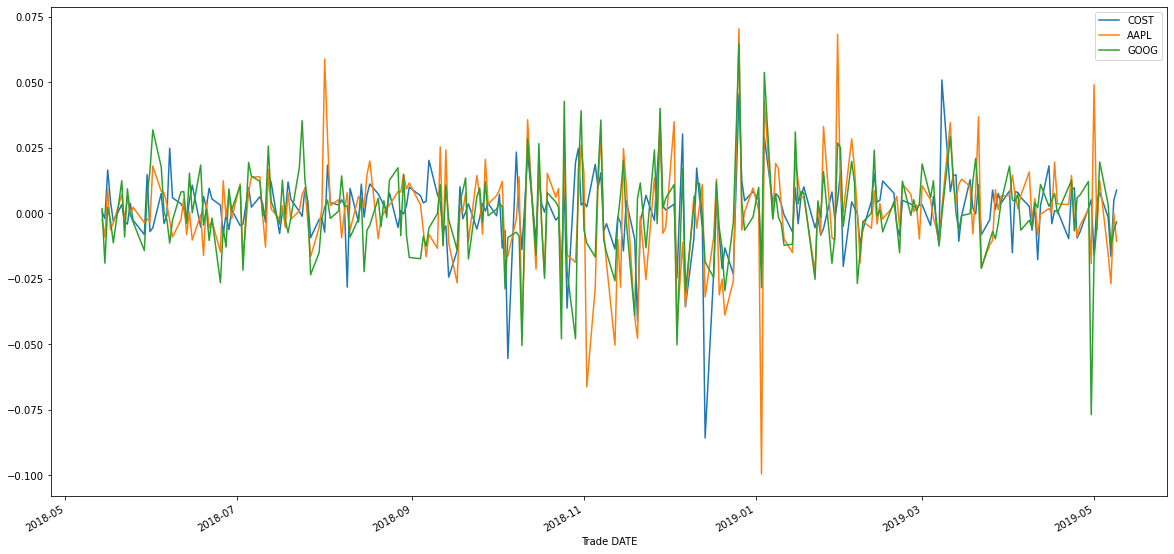

In [13]:
# Calculate daily returns
cag_daily_returns = costaaplgoog_df.pct_change()

# Drop NAs
cag_daily_returns = cag_daily_returns.dropna().copy()
# Display sample data
cag_daily_returns.plot(figsize=(20,10))

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [9]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
cag_port_return = cag_daily_returns.dot(weights)
# Display sample data
columns2 = ["Weighed Return"]
cag_port_return.columns = columns2
cag_port_return

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [10]:
# Join your returns DataFrame to the original returns DataFrame
cag_daily_returns = pd.concat([cag_daily_returns, cag_port_return], axis="columns", join="inner")
columns = "COST", "AAPL", "GOOG", "Weighed Return"
cag_daily_returns.columns = columns
cag_daily_returns

,COST,AAPL,GOOG,Weighed Return
Trade DATE,,,,
2018-05-14,0.000613,-0.002333,0.001766,0.000015
2018-05-15,-0.002042,-0.009088,-0.019060,-0.010064
2018-05-16,0.016523,0.009333,0.002354,0.009403
2018-05-17,0.004479,-0.006324,-0.002940,-0.001595
2018-05-18,-0.003206,-0.003637,-0.011339,-0.006061
...,...,...,...,...
2019-05-03,0.007953,0.012431,0.019602,0.013329
2019-05-06,-0.001594,-0.015443,0.003366,-0.004557
2019-05-07,-0.016583,-0.026957,-0.012855,-0.018798


In [11]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
cag_daily_returns = cag_daily_returns.dropna().copy()
cag_daily_returns

,COST,AAPL,GOOG,Weighed Return
Trade DATE,,,,
2018-05-14,0.000613,-0.002333,0.001766,0.000015
2018-05-15,-0.002042,-0.009088,-0.019060,-0.010064
2018-05-16,0.016523,0.009333,0.002354,0.009403
2018-05-17,0.004479,-0.006324,-0.002940,-0.001595
2018-05-18,-0.003206,-0.003637,-0.011339,-0.006061
...,...,...,...,...
2019-05-03,0.007953,0.012431,0.019602,0.013329
2019-05-06,-0.001594,-0.015443,0.003366,-0.004557
2019-05-07,-0.016583,-0.026957,-0.012855,-0.018798


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

<AxesSubplot:>

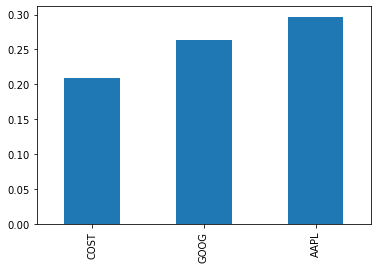

In [22]:
# Calculate the annualized `std`
volatility = cag_daily_returns.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility.plot.bar()


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Trade DATE'>

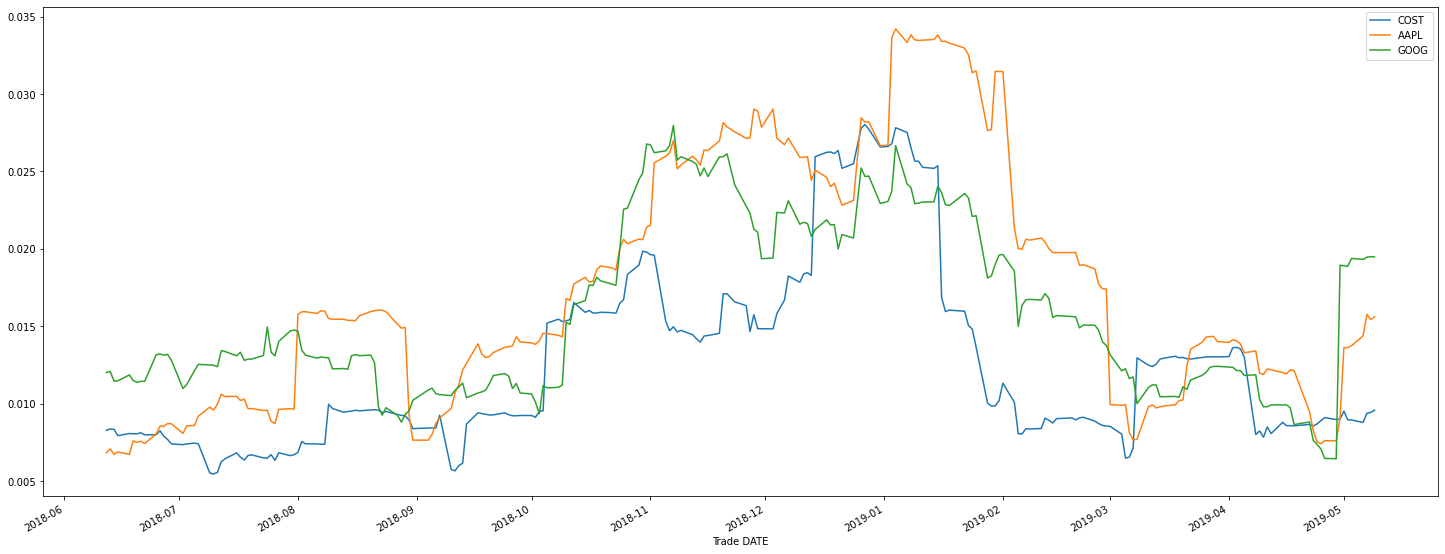

In [26]:
# Calculate rolling standard deviation
cag_std = cag_daily_returns.rolling(21).std()
# Plot rolling standard deviation
cag_std.plot(figsize=(25,10))

### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!